In [1]:
import tensorflow as tf
from tensorflow import keras

IMPORTE SET DE DATOS

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print(fashion_mnist)

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\LauraRamirezEscobar\\AppData\\Roaming\\Python\\Python310\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

EXPLORAR SET DE DATOS

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)


60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

PREPROCESAMIENTO SET DE DATOS

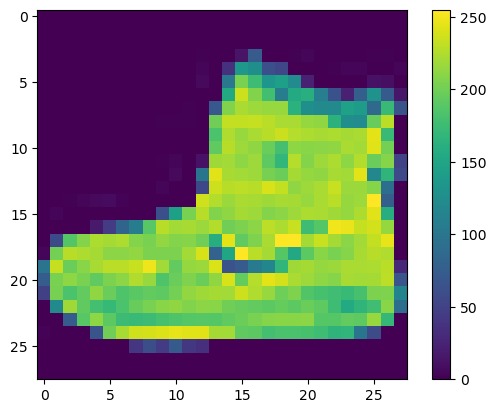

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

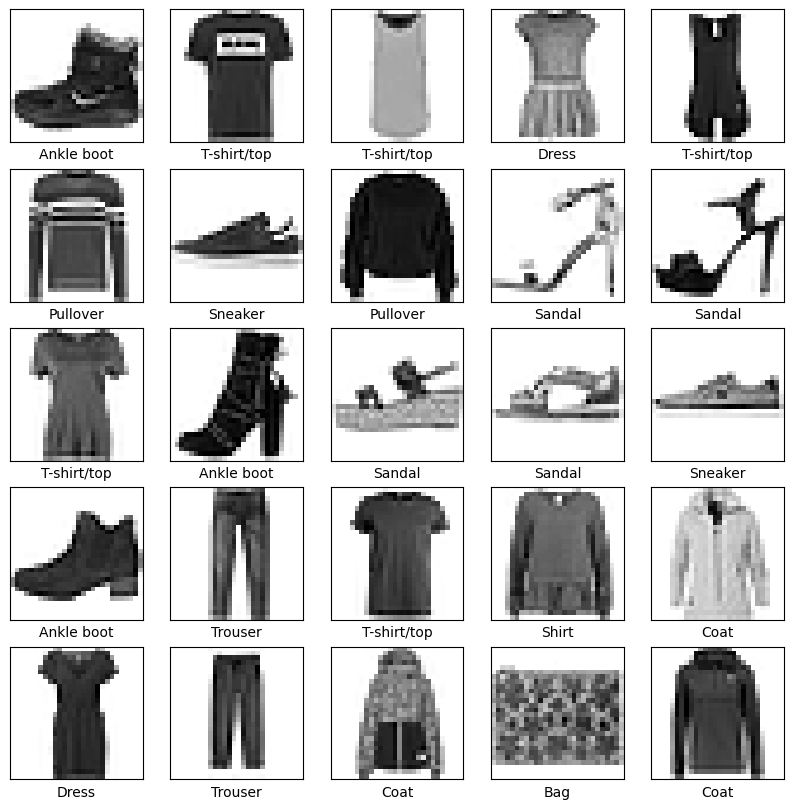

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

CREACIÓN DEL MODELO
CONFIGURAR LAS CAPAS

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

COPILAR EL MODELO

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# ENTRENAR EL MODELO

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4965 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3761 - accuracy: 0.8628
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3360 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3130 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2963 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2809 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2671 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2557 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2462 - accuracy: 0.9091
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.239

EVALUAR EXACTITUD DEL MODELO

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3469 - accuracy: 0.8818 - 1s/epoch - 4ms/step

Test accuracy: 0.8817999958992004


HACER PREDICCIONES

In [20]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [21]:
import numpy as np
np.argmax(predictions[0])

9

GRAFICAR LA PREDICCIÓN

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

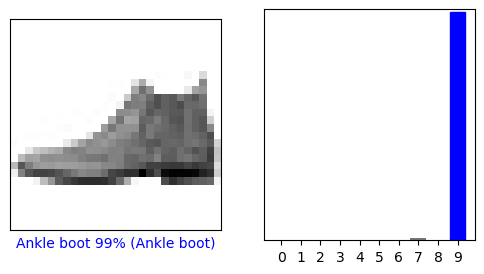

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

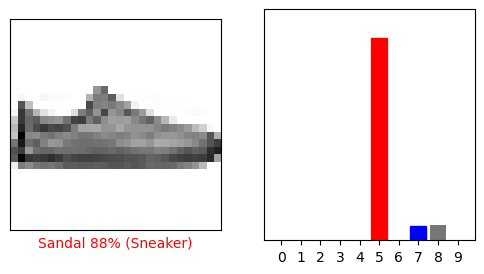

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

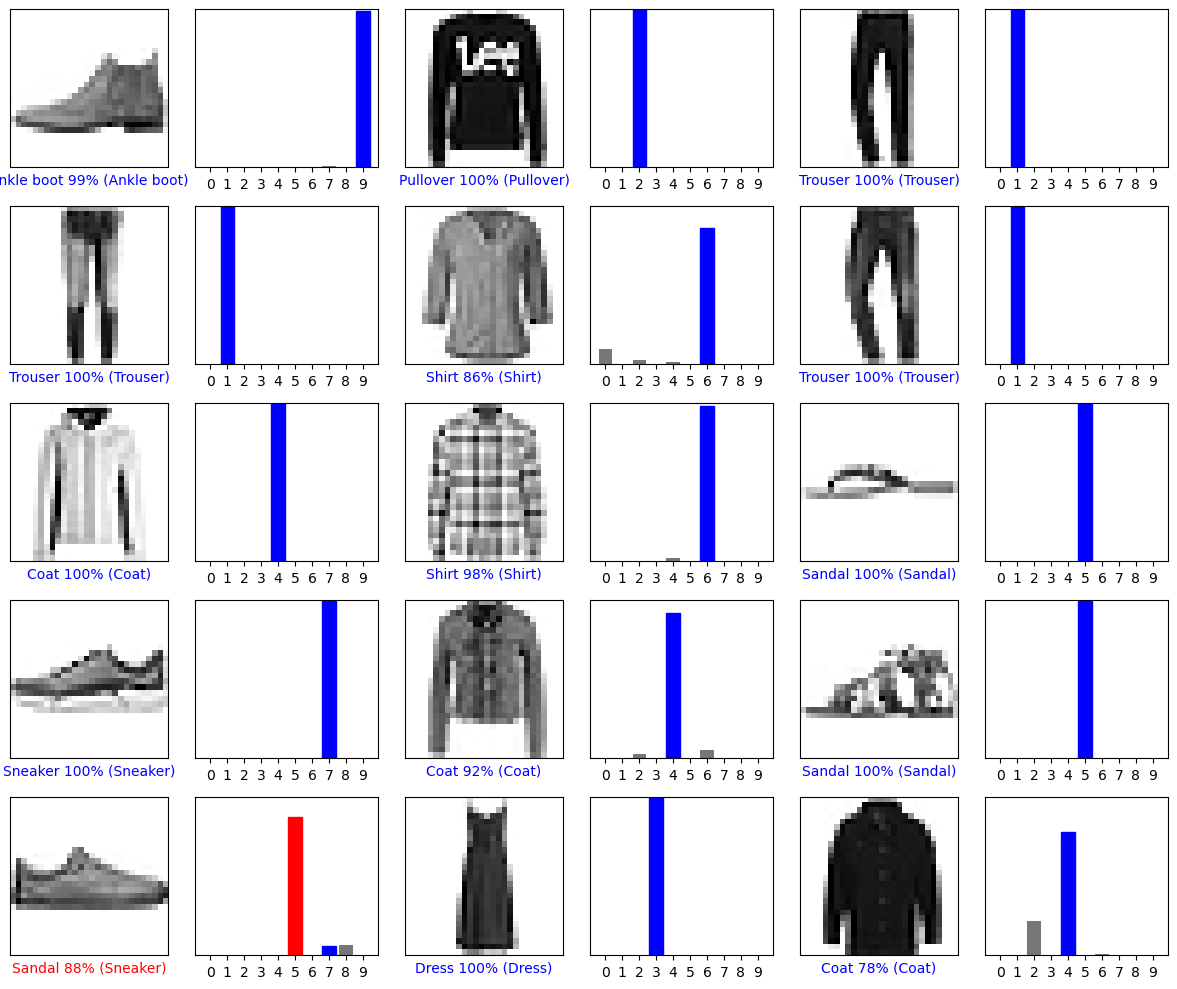

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

PREDICCIÓN DE IMAGEN CHICA

In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Predicción de la etiqueta correcta para esta imagen

In [28]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 48ms/step
[[4.6543773e-05 2.4057845e-16 9.9846041e-01 2.8948491e-12 1.4308498e-03
  3.6974378e-12 6.2243504e-05 2.1611740e-18 4.2515647e-11 3.0589986e-16]]


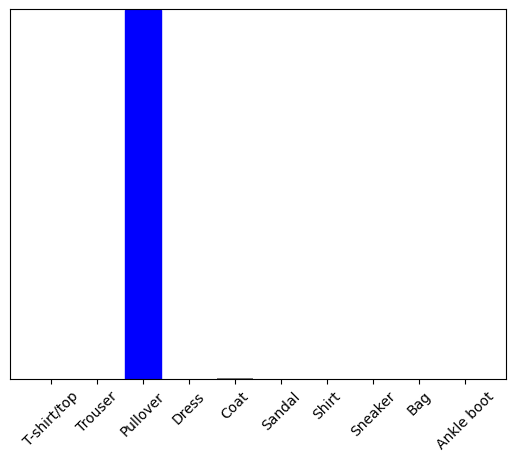

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
np.argmax(predictions_single[0])

2